<a href="https://colab.research.google.com/github/Raushaan/CODSOFT/blob/main/cd_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [18]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

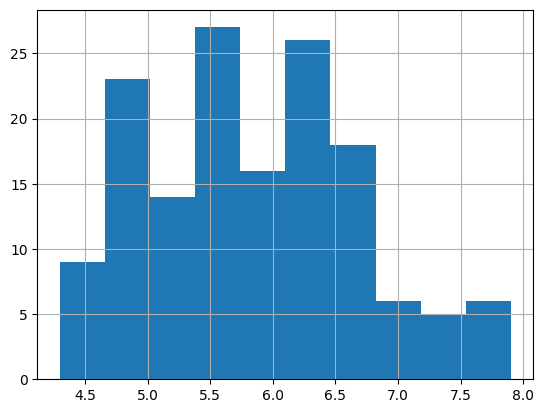

In [ ]:
df['sepal_length'].hist()

<Axes: >

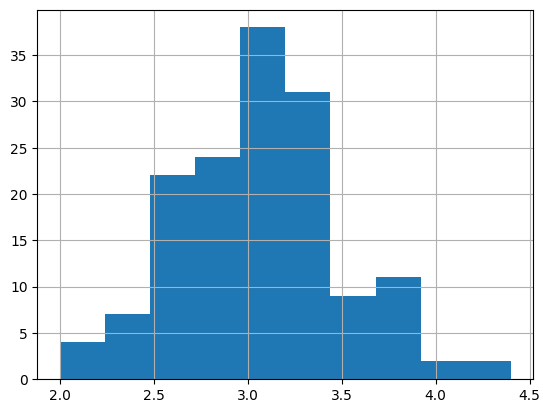

In [21]:
df['sepal_width'].hist()

<Axes: >

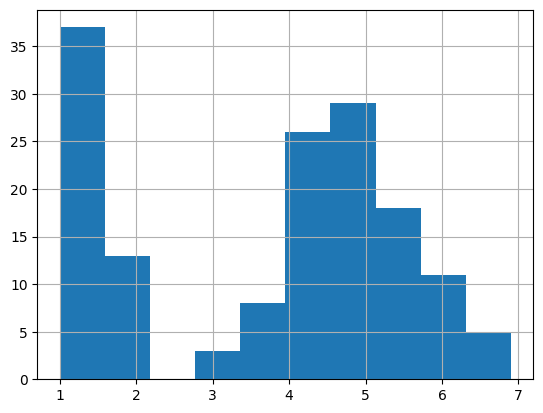

In [22]:
df['petal_length'].hist()

<Axes: >

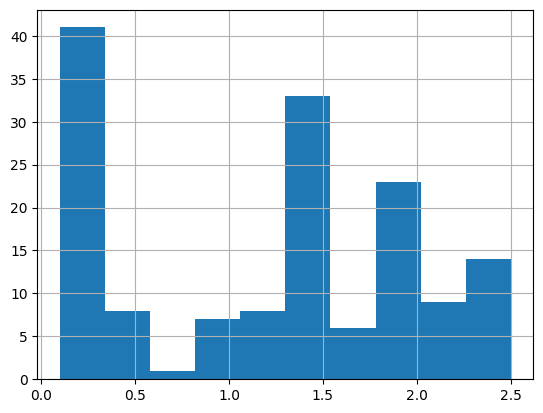

In [23]:
df['petal_width'].hist()

In [24]:
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

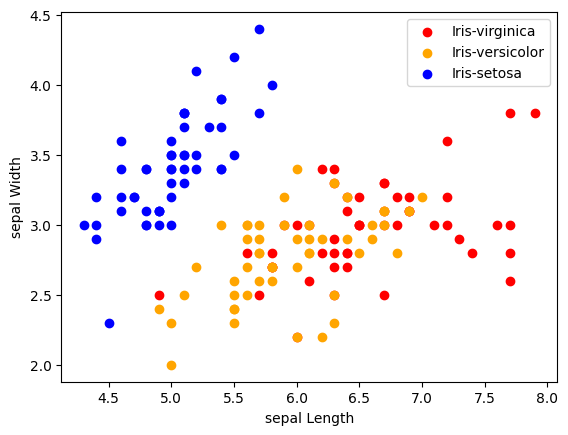

In [26]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
  plt.xlabel("sepal Length")
  plt.ylabel("sepal Width")
  plt.legend()

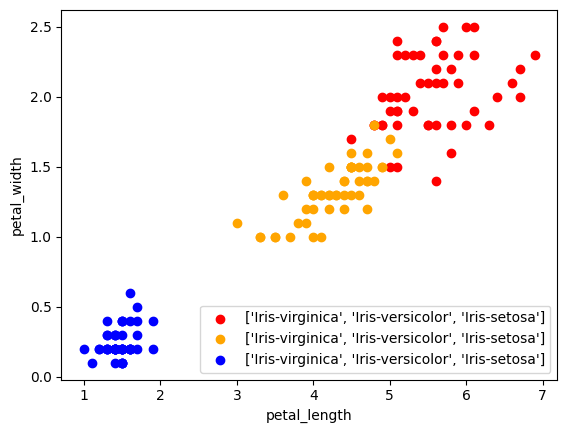

In [27]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species)
  plt.xlabel("petal_length")
  plt.ylabel("petal_width")
  plt.legend()

In [28]:
colors=['green','blue','red']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

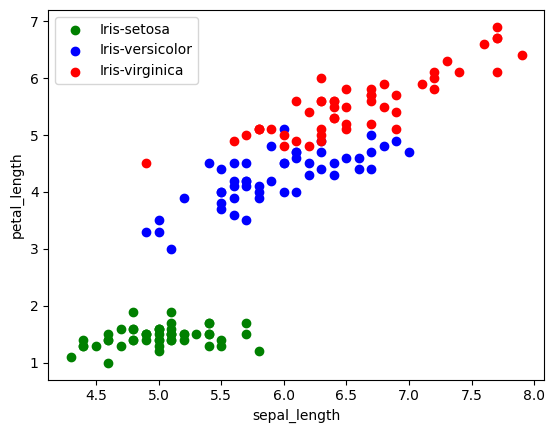

In [30]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
  plt.xlabel("sepal_length")
  plt.ylabel("petal_length")
  plt.legend()

<Axes: >

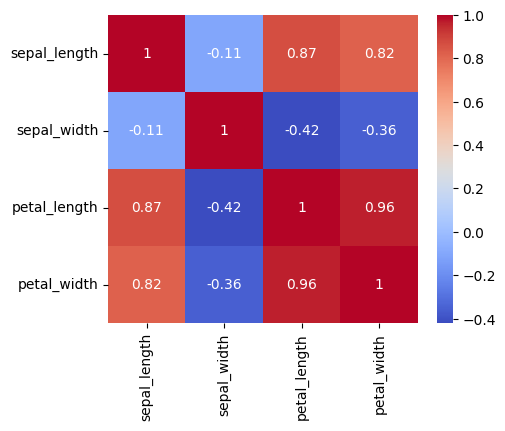

In [36]:
corr = df.drop('species', axis=1).corr()

fig, ax = plt.subplots(figsize=(5,4))
import seaborn as sns # Import seaborn for heatmap
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [38]:
# Drop the non-numeric column
numeric_df = df.drop(columns=['species'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()


In [39]:
correlation_matrix.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.941225,0.975716,0.963204
sepal_width,-0.941225,1.000000,-0.992071,-0.994744
petal_length,0.975716,-0.992071,1.000000,0.997991
petal_width,0.963204,-0.994744,0.997991,1.000000


In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

In [48]:
km=KMeans(n_clusters=3,random_state=0,)
y_predicted=km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [51]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['species'])
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)


In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [53]:
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
print("accuracy",model.score(x_test,y_test)*100)

accuracy 100.0


In [55]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [56]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [57]:
print("accuracy:",model.score(x_test,y_test)*100)

accuracy: 97.77777777777777


In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [59]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
print("accuracy:",model.score(x_test,y_test)*100)

accuracy: 95.55555555555556
